Virve Rajasärkkä   
Ennakoivat analytiikkamenetelmät, HAMK   
syksy 2023

Aineisto kurssimateriaalista

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [37]:
df = pd.read_excel('autoMPG_data.xlsx')
df.head()

,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3,Name
0,5.555556,5.555556,18.0,8,3.07,1.30,3.504,12.0,70,1,1,1,0,0,chevrolet chevelle malibu
1,6.666667,6.666667,15.0,8,3.50,1.65,3.693,11.5,70,1,1,1,0,0,buick skylark 320
2,5.555556,5.555556,18.0,8,3.18,1.50,3.436,11.0,70,1,1,1,0,0,plymouth satellite
3,6.250000,6.250000,16.0,8,3.04,1.50,3.433,12.0,70,1,1,1,0,0,amc rebel sst
4,5.882353,5.882353,17.0,8,3.02,1.40,3.449,10.5,70,1,1,1,0,0,ford torino


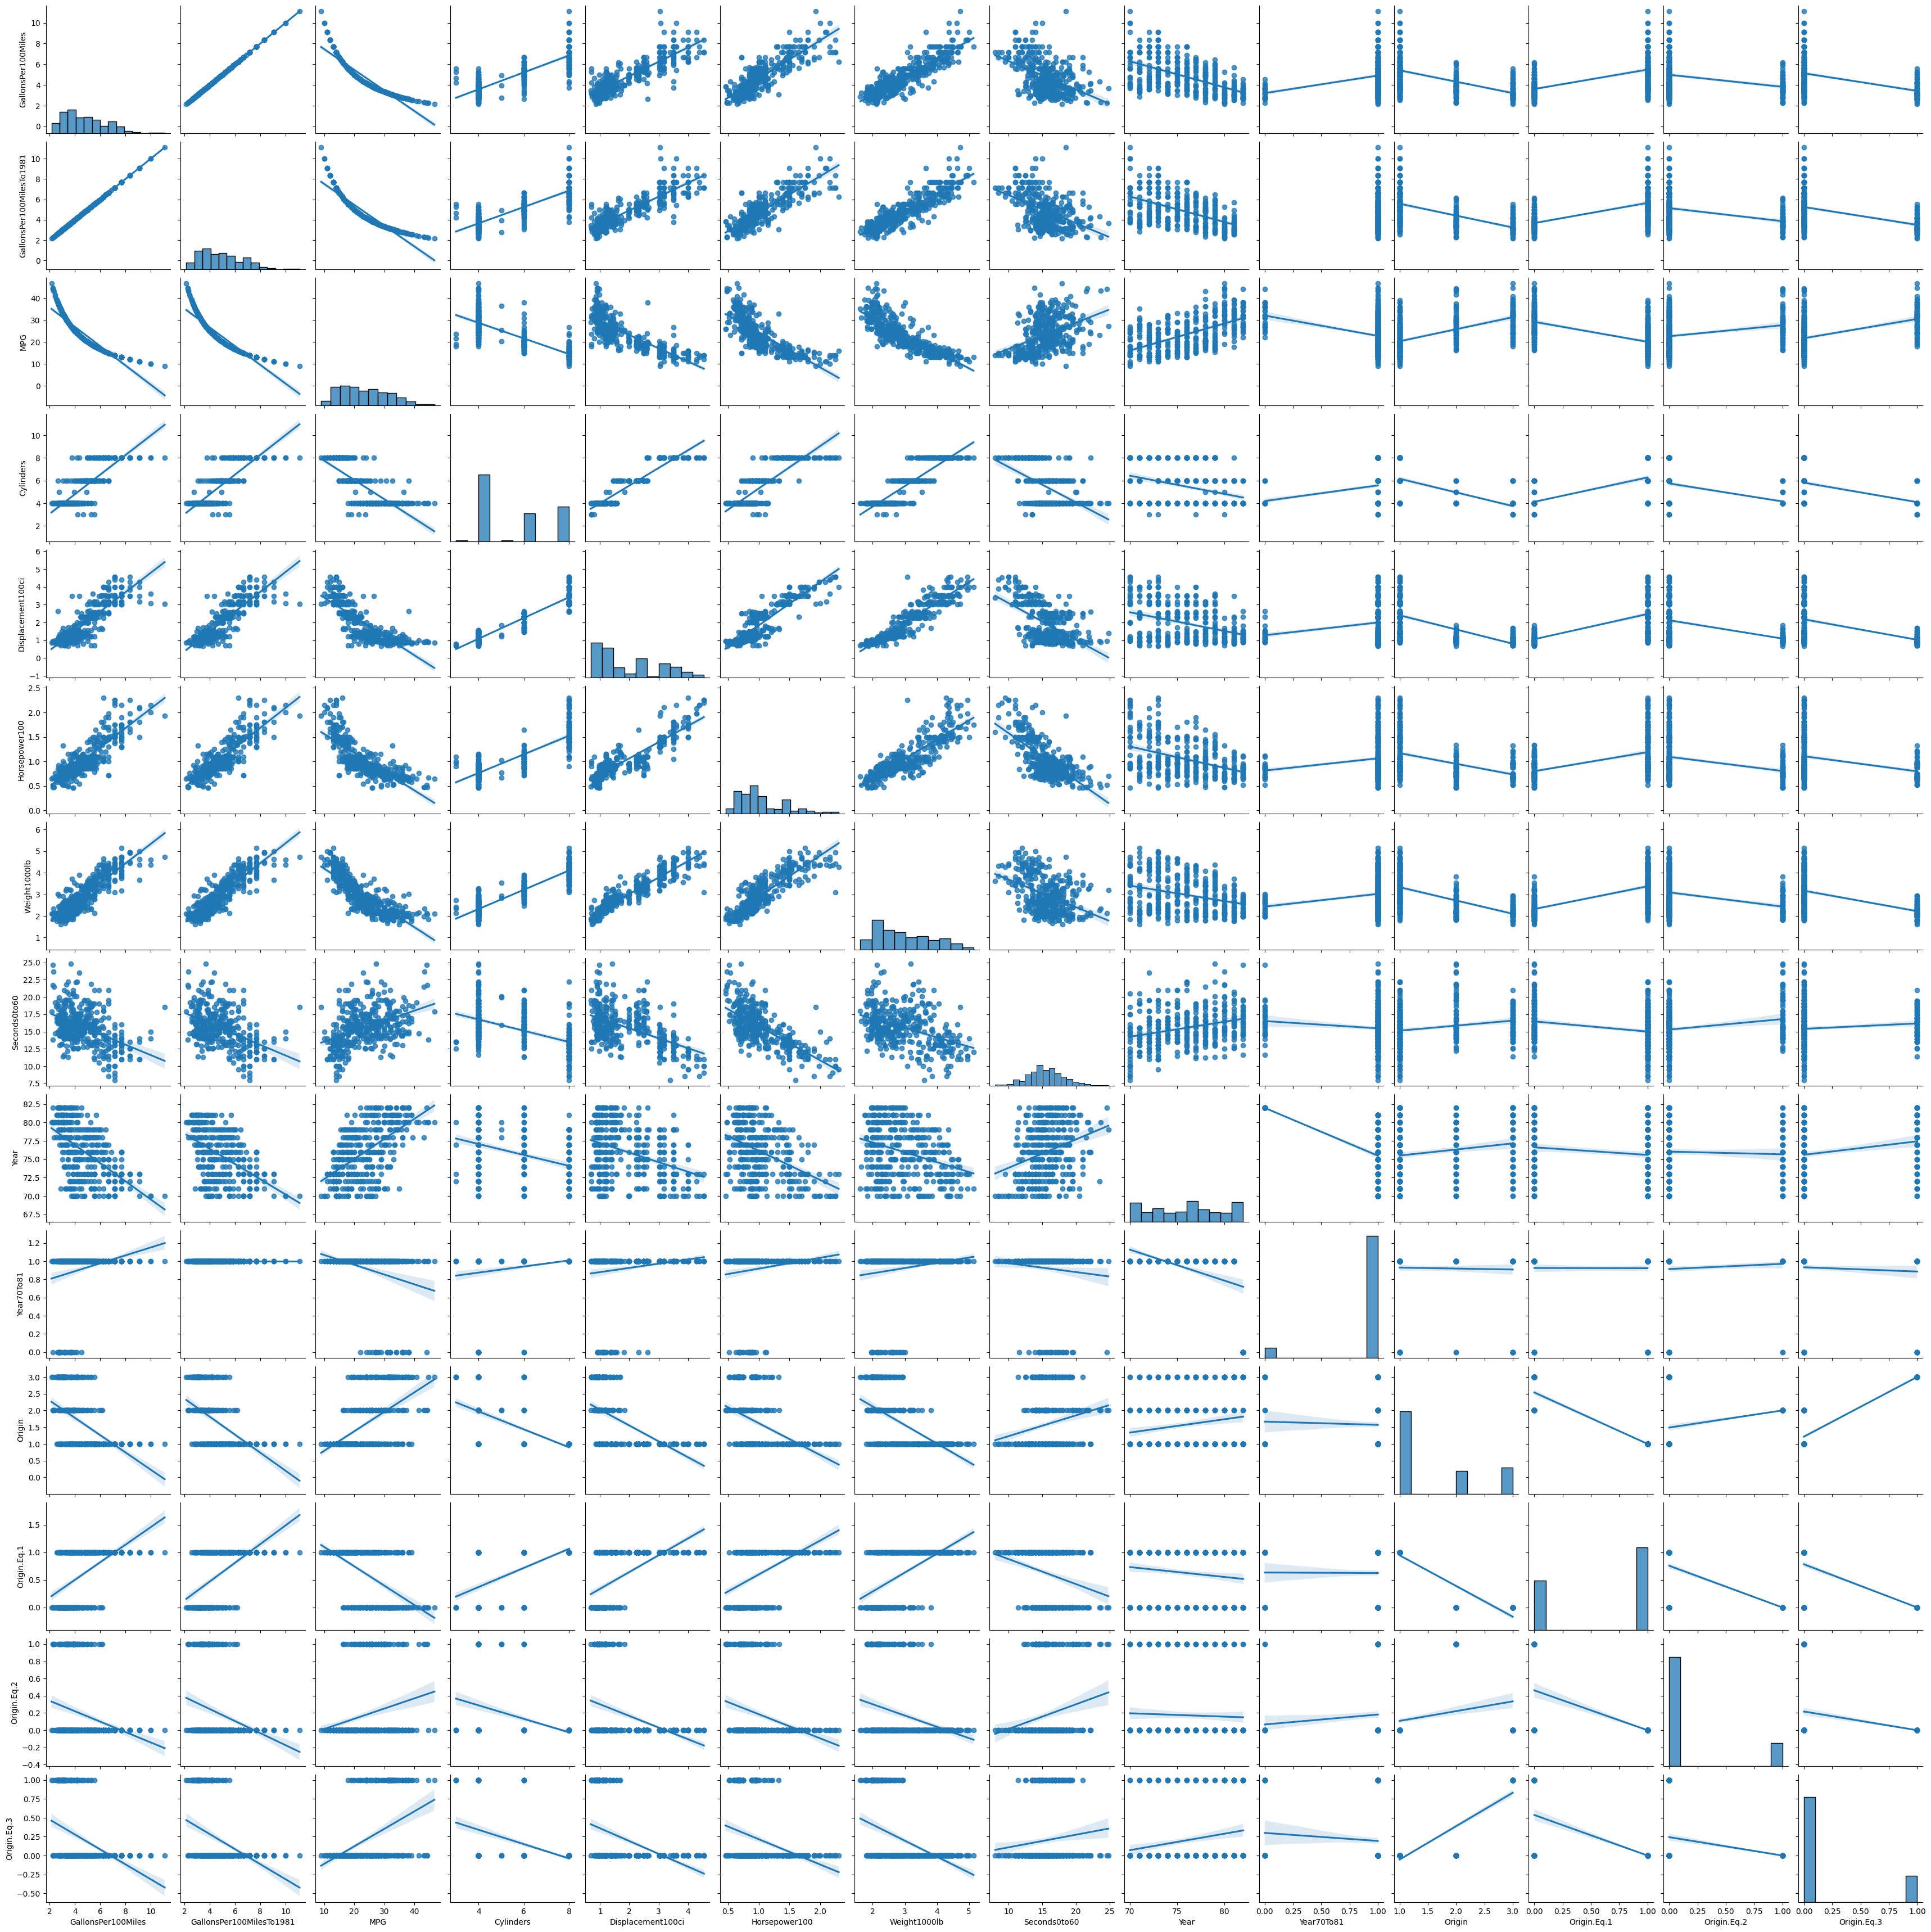

In [38]:
sns.pairplot(df, kind='reg')

Ylläolevien perusteella näyttäisi, että tarkastelemisen arvoisia muuttujia on Cylinders, Displacement, Horsepower, Weight ja Seconds0to60. Tiputetaan loput.

In [39]:
df.drop(df.loc[:, 'GallonsPer100MilesTo1981':'MPG'], axis=1, inplace=True)
df.drop(df.loc[:,'Year':], axis=1, inplace=True)
df.head()

,GallonsPer100Miles,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60
0,5.555556,8,3.07,1.30,3.504,12.0
1,6.666667,8,3.50,1.65,3.693,11.5
2,5.555556,8,3.18,1.50,3.436,11.0
3,6.250000,8,3.04,1.50,3.433,12.0
4,5.882353,8,3.02,1.40,3.449,10.5


In [40]:
df.isnull().sum()

GallonsPer100Miles    0
Cylinders             0
Displacement100ci     0
Horsepower100         0
Weight1000lb          0
Seconds0to60          0
dtype: int64

In [41]:
df.corr(numeric_only=True)

,GallonsPer100Miles,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60
GallonsPer100Miles,1.000000,0.839385,0.866050,0.854809,0.885056,-0.456338
Cylinders,0.839385,1.000000,0.950823,0.842983,0.897527,-0.504683
Displacement100ci,0.866050,0.950823,1.000000,0.897257,0.932994,-0.543800
Horsepower100,0.854809,0.842983,0.897257,1.000000,0.864538,-0.689196
Weight1000lb,0.885056,0.897527,0.932994,0.864538,1.000000,-0.416839
Seconds0to60,-0.456338,-0.504683,-0.543800,-0.689196,-0.416839,1.000000


<Axes: >

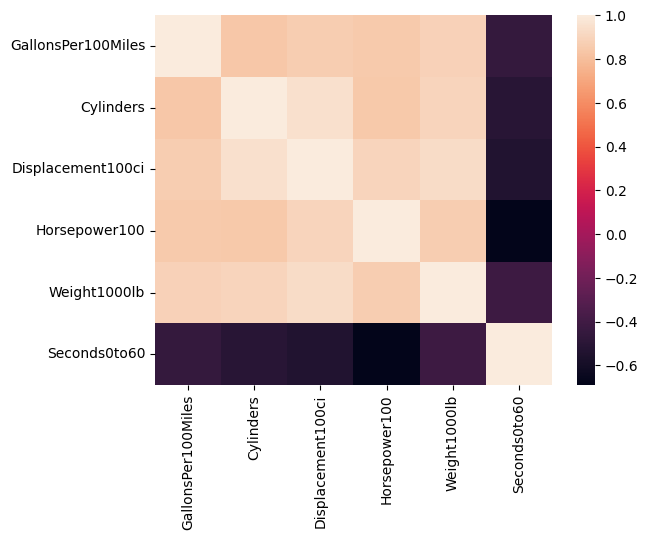

In [42]:
sns.heatmap(df.corr(numeric_only=True))

2.1459227467811157
11.11111111111111


<Axes: >

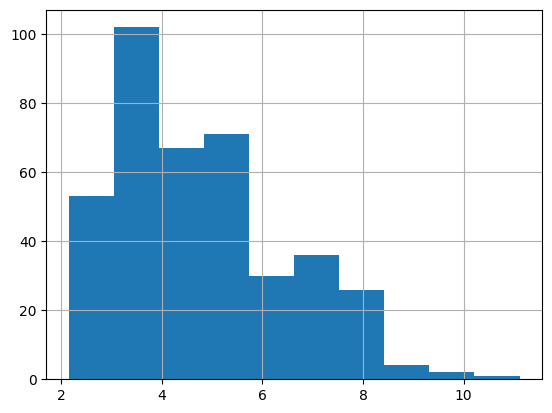

In [43]:
#GallonsPer100Miles
print(df['GallonsPer100Miles'].min())
print(df['GallonsPer100Miles'].max())
df['GallonsPer100Miles'].hist()

3
8


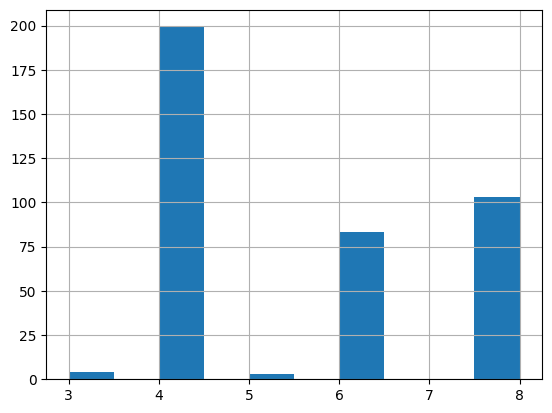

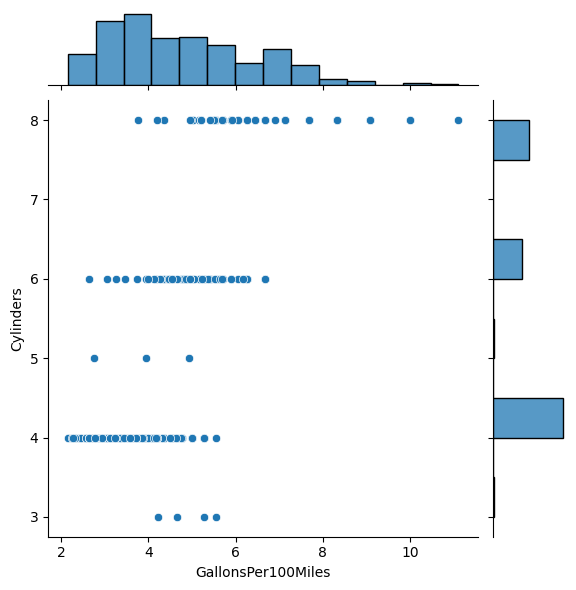

In [44]:
#Cylinders
print(df['Cylinders'].min())
print(df['Cylinders'].max())
df['Cylinders'].hist()
ax = sns.jointplot(data = df, x = 'GallonsPer100Miles', y = 'Cylinders')

0.68
4.55


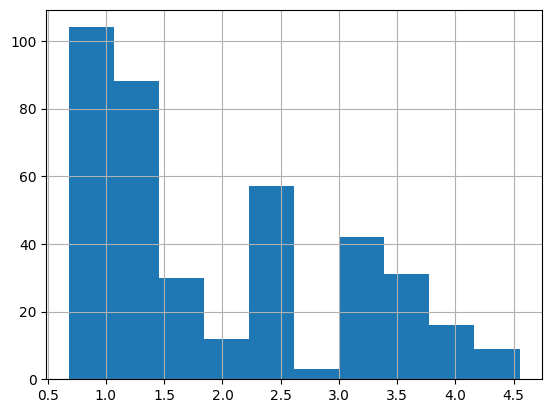

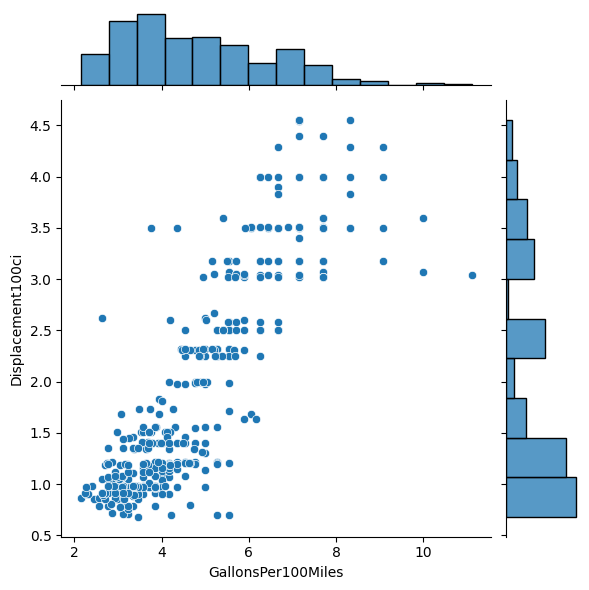

In [45]:
#Displacement100ci
print(df['Displacement100ci'].min())
print(df['Displacement100ci'].max())
df['Displacement100ci'].hist()
ax = sns.jointplot(data = df, x = 'GallonsPer100Miles', y = 'Displacement100ci')

0.46
2.3


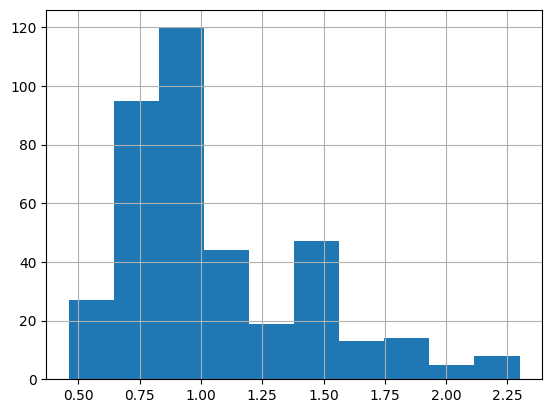

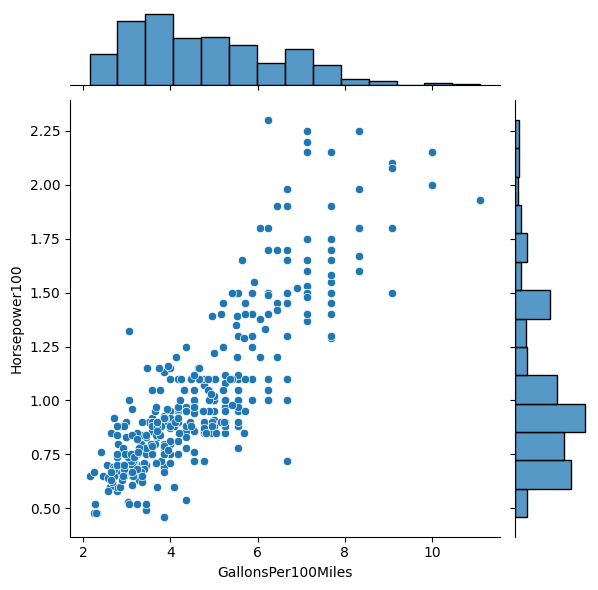

In [46]:
#Horsepower100
print(df['Horsepower100'].min())
print(df['Horsepower100'].max())
df['Horsepower100'].hist()
ax = sns.jointplot(data = df, x = 'GallonsPer100Miles', y = 'Horsepower100')

1.613
5.14


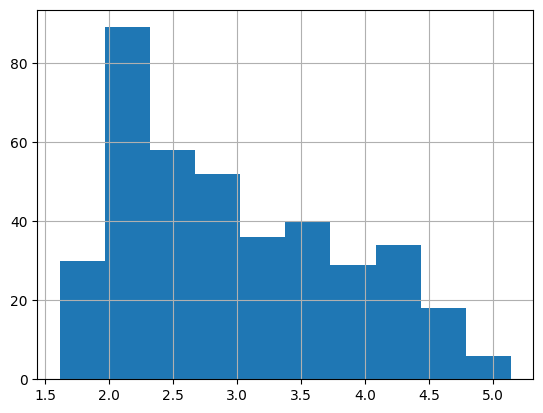

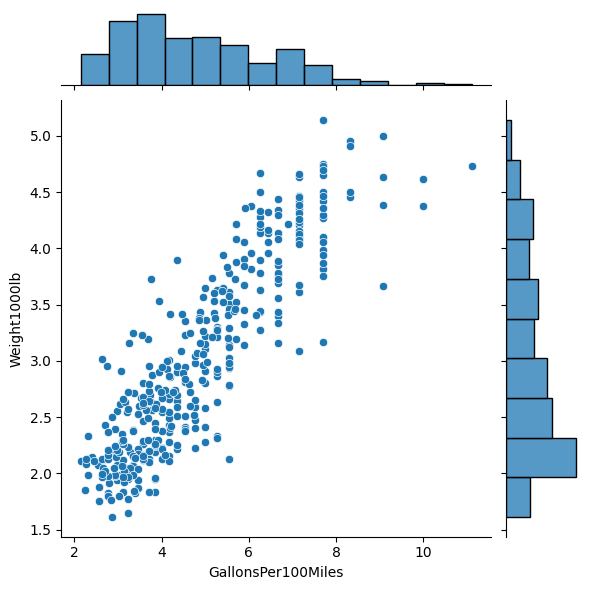

In [47]:
#Weight1000lb
print(df['Weight1000lb'].min())
print(df['Weight1000lb'].max())
df['Weight1000lb'].hist()
ax = sns.jointplot(data = df, x = 'GallonsPer100Miles', y = 'Weight1000lb')

8.0
24.8


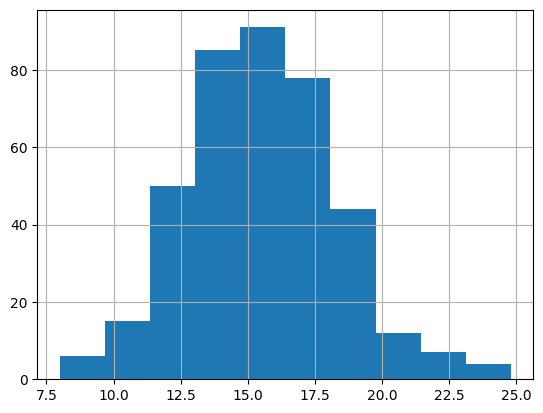

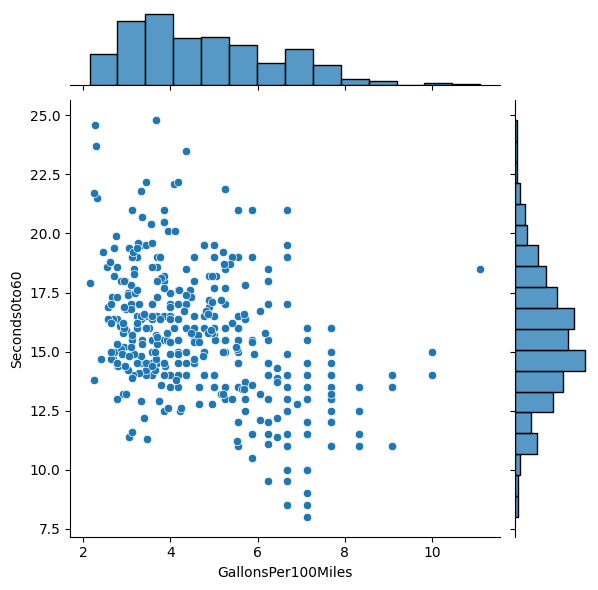

In [48]:
#Seconds0to60
print(df['Seconds0to60'].min())
print(df['Seconds0to60'].max())
df['Seconds0to60'].hist()
ax = sns.jointplot(data = df, x = 'GallonsPer100Miles', y = 'Seconds0to60')

Tutkitaan erilaiset kolmen muuttujan yhdistelmät

In [58]:
# y on koko ajan sama GallonsPer100Miles
y = df['GallonsPer100Miles']
models = {}

0.7852260524075363


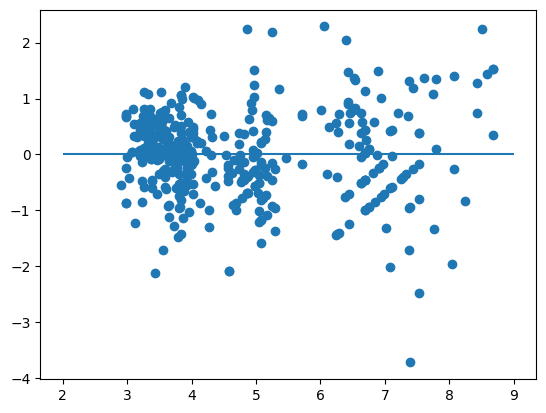

In [59]:
# Malli 1, Cylinders, Displacement, Horsepower
X1 = df[['Cylinders', 'Displacement100ci', 'Horsepower100']]
fuel_model1 = LinearRegression().fit(X1,y)
fuel_model1.coef_
fuel_model1.intercept_
print(fuel_model1.score(X1,y))
plt.scatter(fuel_model1.predict(X1), fuel_model1.predict(X1)-y)
plt.hlines(y=0, xmin=2, xmax=9)
models['model 1'] = fuel_model1.score(X1,y)

Coef: [0.09980453 0.35223871 1.14902563]
Intercept: 0.13000367375959865
Score: 0.7968572537195897


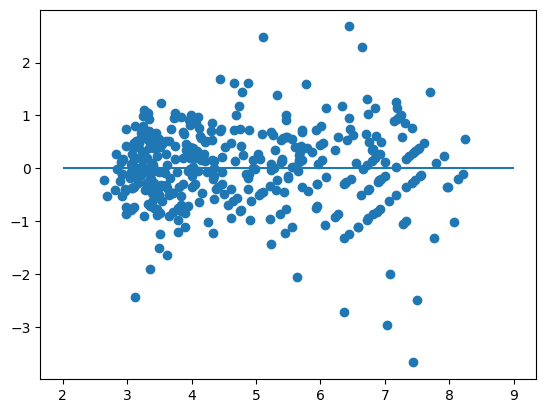

In [73]:
# Malli 2, Cylinders, Displacement, Weight
X2 = df[['Cylinders', 'Displacement100ci', 'Weight1000lb']]
fuel_model2 = LinearRegression().fit(X2,y)
print(f"Coef: {fuel_model2.coef_}")
print(f"Intercept: {fuel_model2.intercept_}")
print(f"Score: {fuel_model2.score(X2,y)}")
plt.scatter(fuel_model2.predict(X2), fuel_model2.predict(X2)-y)
plt.hlines(y=0, xmin=2, xmax=9)
models['model 2'] = fuel_model2.score(X2,y)

Coef: [0.15966717 1.14509777 0.01078588]
Intercept: 1.5147195250060976
Score: 0.7529103569205208


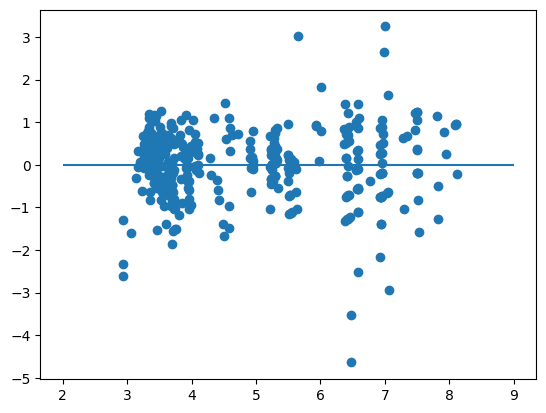

In [74]:
# Malli 3, Cylinders, Displacement, Seconds0to60
X3 = df[['Cylinders', 'Displacement100ci', 'Seconds0to60']]
fuel_model3 = LinearRegression().fit(X3,y)
print(f"Coef: {fuel_model3.coef_}")
print(f"Intercept: {fuel_model3.intercept_}")
print(f"Score: {fuel_model3.score(X3,y)}")
plt.scatter(fuel_model3.predict(X3), fuel_model3.predict(X3)-y)
plt.hlines(y=0, xmin=2, xmax=9)
models['model 3'] = fuel_model3.score(X3,y)

Coef: [0.11723019 1.39641256 0.97541554]
Intercept: -0.2224391509097554
Score: 0.8176921365228299


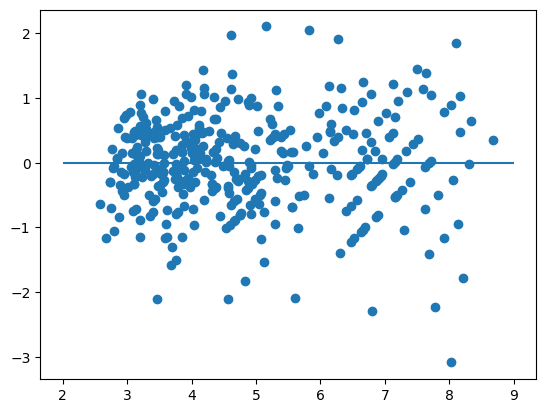

In [75]:
# Malli 4, Cylinders, Horsepower, Weight
X4 = df[['Cylinders', 'Horsepower100', 'Weight1000lb']]
fuel_model4 = LinearRegression().fit(X4,y)
print(f"Coef: {fuel_model4.coef_}")
print(f"Intercept: {fuel_model4.intercept_}")
print(f"Score: {fuel_model4.score(X4,y)}")
plt.scatter(fuel_model4.predict(X4), fuel_model4.predict(X4)-y)
plt.hlines(y=0, xmin=2, xmax=9)
models['model 4'] = fuel_model4.score(X4,y)

Coef: [0.34875945 2.99115592 0.12121342]
Intercept: -2.134807157123892
Score: 0.7998582918652755


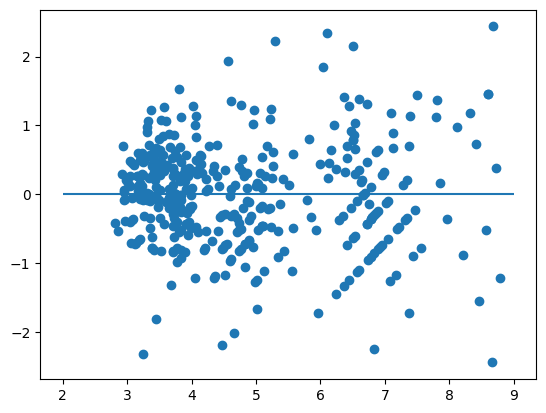

In [76]:
# Malli 5, Cylinders, Horsepower, Seconds0to60
X5 = df[['Cylinders', 'Horsepower100', 'Seconds0to60']]
fuel_model5 = LinearRegression().fit(X5,y)
print(f"Coef: {fuel_model5.coef_}")
print(f"Intercept: {fuel_model5.intercept_}")
print(f"Score: {fuel_model5.score(X5,y)}")
plt.scatter(fuel_model5.predict(X5), fuel_model5.predict(X5)-y)
plt.hlines(y=0, xmin=2, xmax=9)
models['model 5'] = fuel_model5.score(X5,y)

Coef: [ 0.17515643  1.35486077 -0.04669464]
Intercept: 0.5152821944075532
Score: 0.7981758929166383


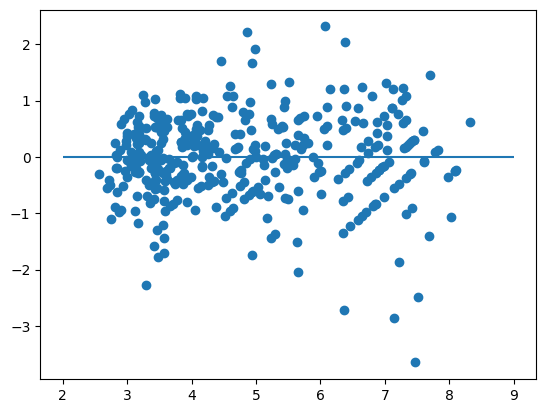

In [77]:
# Malli 6, Cylinders, Weight, Seconds0to60
X6 = df[['Cylinders', 'Weight1000lb', 'Seconds0to60']]
fuel_model6 = LinearRegression().fit(X6,y)
print(f"Coef: {fuel_model6.coef_}")
print(f"Intercept: {fuel_model6.intercept_}")
print(f"Score: {fuel_model6.score(X6,y)}")
plt.scatter(fuel_model6.predict(X6), fuel_model6.predict(X6)-y)
plt.hlines(y=0, xmin=2, xmax=9)
models['model 6'] = fuel_model6.score(X6,y)

Coef: [0.13320096 1.40433496 1.03050654]
Intercept: -0.012235972571574827
Score: 0.8158213878482583


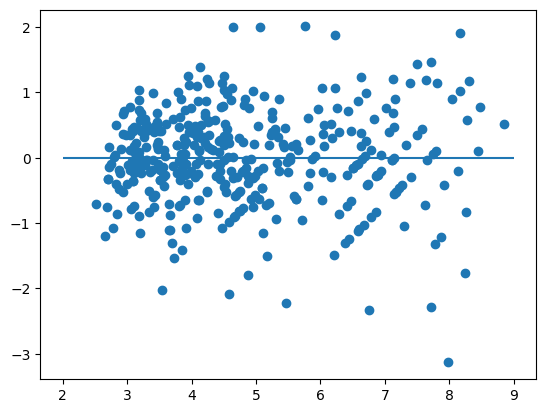

In [78]:
# Malli 7, Displacement, Horsepower, Weight
X7 = df[['Displacement100ci', 'Horsepower100', 'Weight1000lb']]
fuel_model7 = LinearRegression().fit(X7,y)
print(f"Coef: {fuel_model7.coef_}")
print(f"Intercept: {fuel_model7.intercept_}")
print(f"Score: {fuel_model7.score(X7,y)}")
plt.scatter(fuel_model7.predict(X7), fuel_model7.predict(X7)-y)
plt.hlines(y=0, xmin=2, xmax=9)
models['model 7'] = fuel_model7.score(X7,y)

Coef: [0.69183673 2.5770745  0.11527091]
Intercept: -1.0464876235848646
Score: 0.7991802546954345


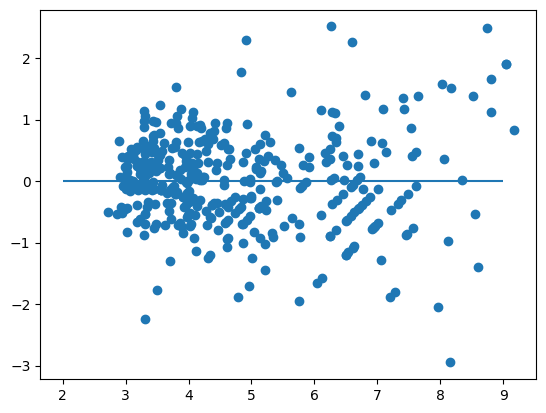

In [79]:
# Malli 8, Displacement, Horsepower, Seconds0to60
X8 = df[['Displacement100ci', 'Horsepower100', 'Seconds0to60']]
fuel_model8 = LinearRegression().fit(X8,y)
print(f"Coef: {fuel_model8.coef_}")
print(f"Intercept: {fuel_model8.intercept_}")
print(f"Score: {fuel_model8.score(X8,y)}")
plt.scatter(fuel_model8.predict(X8), fuel_model8.predict(X8)-y)
plt.hlines(y=0, xmin=2, xmax=9)
models['model 8'] = fuel_model8.score(X8,y)

Coef: [ 0.37837402  1.24891309 -0.03690277]
Intercept: 0.9014124464031275
Score: 0.7982615176671357


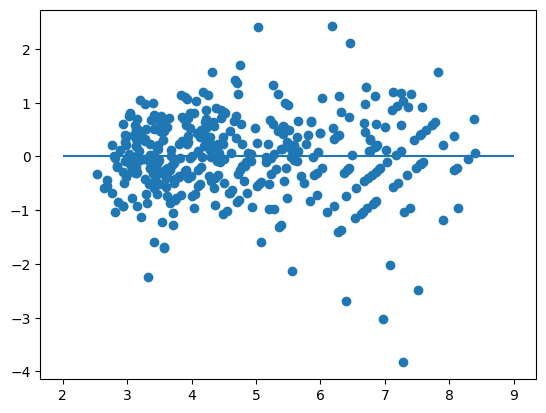

In [80]:
# Malli 9, Displacement, Weight, Seconds0to60
X9 = df[['Displacement100ci', 'Weight1000lb', 'Seconds0to60']]
fuel_model9 = LinearRegression().fit(X9,y)
print(f"Coef: {fuel_model9.coef_}")
print(f"Intercept: {fuel_model9.intercept_}")
print(f"Score: {fuel_model9.score(X9,y)}")
plt.scatter(fuel_model9.predict(X9), fuel_model9.predict(X9)-y)
plt.hlines(y=0, xmin=2, xmax=9)
models['model 9'] = fuel_model9.score(X9,y)

Coef: [1.94837551 1.0305509  0.0443749 ]
Intercept: -1.011410027227595
Score: 0.817296123232121


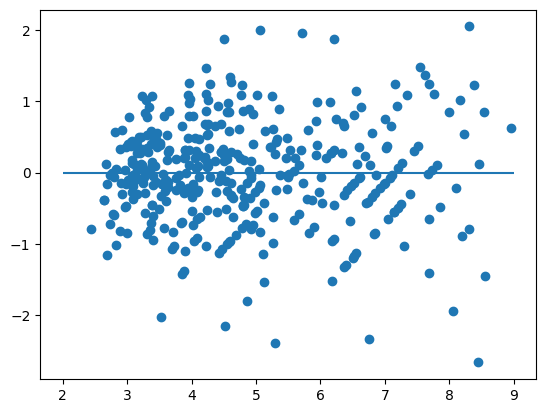

In [81]:
# Malli 10, Horsepower, Weight, Seconds0to60
X10 = df[['Horsepower100', 'Weight1000lb', 'Seconds0to60']]
fuel_model10 = LinearRegression().fit(X10,y)
print(f"Coef: {fuel_model10.coef_}")
print(f"Intercept: {fuel_model10.intercept_}")
print(f"Score: {fuel_model10.score(X10,y)}")
plt.scatter(fuel_model10.predict(X10), fuel_model10.predict(X10)-y)
plt.hlines(y=0, xmin=2, xmax=9)
models['model 10'] = fuel_model10.score(X10,y)

In [96]:
for model, score in models.items():
    print(f"{model}: {score:.4f}")
max_score = max(models, key=models.get)
print(f"Suurin score: {max_score}")

model 1: 0.7852
model 2: 0.7969
model 3: 0.7529
model 4: 0.8177
model 5: 0.7999
model 6: 0.7982
model 7: 0.8158
model 8: 0.7992
model 9: 0.7983
model 10: 0.8173
Suurin score: model 4


Suurin score on siis mallilla 4 eli muuttujayhdistelmällä Cylinders, Horsepower, Weight. Tehdään sillä ennustukset.

In [102]:
# interpoloitu
print(fuel_model4.predict([[4, 1.5, 5]]))

# extrapoloitu
print(fuel_model4.predict([[8, 2.5, 8]]))

[7.21817813]
[12.00975806]


c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
